In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [25]:
#data preparation
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.3]])

#normal distribution
dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape,dist_02.shape)

(500, 2) (500, 2)


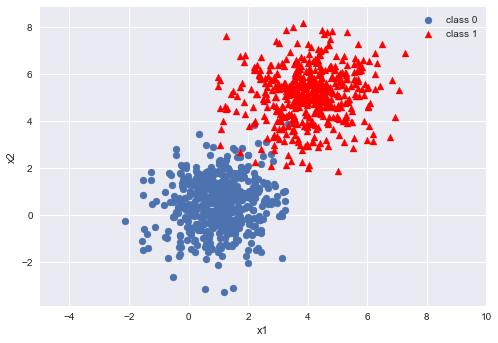

In [26]:
#data visualize
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],label='class 1',marker='^',color='r')
plt.xlim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [27]:
#creating train and test data set
data=np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [28]:
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[:500,-1]=1

In [29]:
np.random.shuffle(data)
print(data[:10])

[[1.3770996  1.37825993 1.        ]
 [4.31809211 4.44715052 0.        ]
 [5.98864941 5.41680388 0.        ]
 [1.1424526  0.2723663  1.        ]
 [1.17849476 1.36075719 1.        ]
 [0.12416192 1.41381415 1.        ]
 [2.78576465 6.36970961 0.        ]
 [4.33691291 7.06543863 0.        ]
 [4.75763482 6.28134775 0.        ]
 [6.26611335 6.01370851 0.        ]]


In [30]:
split=int(0.8*data.shape[0])
X_train=data[:split,:2]
X_test=data[split:,:2]
Y_train=data[:split,-1]
Y_test=data[split:,-1]

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


In [31]:
#logistic regression implementation
def hypothesis(x,w,b):
    '''accepts input vector x,input weight vector w/theta and bias b'''
    h=np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    return -err/m

def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grade_b=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w=(y_true[i]-hx)*x[i]
        grad_b=(-1)*(y_true[i]-hx)
    grad_w/=m
    grad_b/=m
    return [grad_w,grad_b]


In [32]:
#one iteration of gradient descent
def grad_Descent(x,y_true,w,b,learning_rate=0.1):
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grads(y_true,x,w,b)
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    return err,w,b

def predict(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    y_pred=[]
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w,b)
        y_pred.append(p)
    y_pred=np.array(y_pred) 
    return float((y_pred==y_tst).sum())/y_tst.shape[0]

In [41]:
loss=[]
acc=[]
w=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()

for i in range(1000):
    l,w,b=grad_Descent(X_train,Y_train,w,b,learning_rate=0.5)
    acc.append(get_acc(X_test,Y_test,w,b))
    loss.append(l)

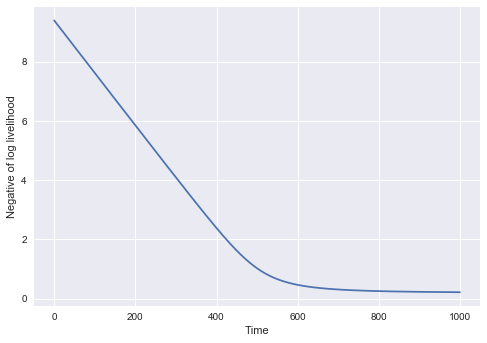

In [42]:
plt.plot(loss)
plt.xlabel("Time")
plt.ylabel("Negative of log livelihood")
plt.show()

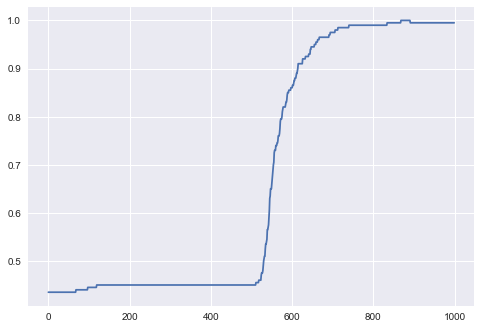

0.995


In [43]:
plt.plot(acc)
plt.show()
print(acc[-1])

In [44]:
print(w)
print(b)

[-0.38169943 -0.70315822]
2.707038859710513


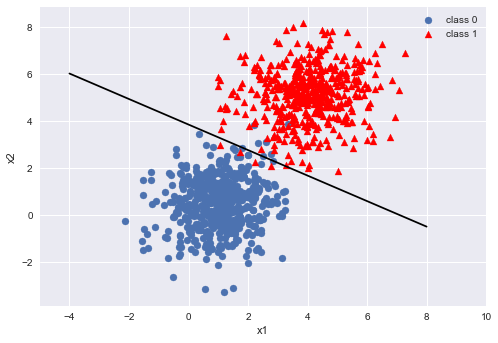

In [45]:
#decision boundary
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],label='class 1',marker='^',color='r')
x=np.linspace(-4,8,10)
y=-(w[0]*x+b)/w[1]
plt.plot(x,y,color='k')
plt.xlim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()